In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/Projects/ML course Clg/datasets/Synthetic-Infant-Health-Data.csv")
data

,Unnamed: 0,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,...,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,0,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,...,Asy/Patchy,TGA,no,4-10_days,no,Lt_to_Rt,Transp.,Normal,Normal,no
1,1,no,Equal,Moderate,High,Grd_Glass,no,no,<5,5-12,...,Grd_Glass,Fallot,no,0-3_days,no,Rt_to_Lt,Mild,Abnormal,High,no
2,2,no,Equal,Severe,Normal,Plethoric,no,yes,5-12,5-12,...,Normal,PFC,no,0-3_days,no,Lt_to_Rt,Complete,Normal,High,no
3,3,no,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,...,Plethoric,PAIVS,no,0-3_days,no,NaN,Complete,Normal,Low,no
4,4,no,Equal,Moderate,Normal,Plethoric,no,yes,12+,5-12,...,Plethoric,PAIVS,no,0-3_days,yes,Lt_to_Rt,Complete,Normal,Normal,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,no,Equal,Moderate,Normal,Normal,no,no,5-12,5-12,...,Normal,PAIVS,no,0-3_days,no,Lt_to_Rt,Transp.,Normal,Normal,no
14996,14996,no,Equal,Moderate,Normal,Plethoric,no,yes,<5,5-12,...,Plethoric,Fallot,no,0-3_days,yes,Lt_to_Rt,Complete,Abnormal,High,yes
14997,14997,no,Equal,Moderate,High,Normal,no,no,5-12,<5,...,Normal,Fallot,yes,0-3_days,no,NaN,Complete,Normal,High,yes
14998,14998,no,Equal,Mild,Normal,Normal,no,no,<5,<5,...,Normal,TGA,no,0-3_days,no,NaN,Transp.,Normal,High,no


In [3]:
data.columns

Index(['Unnamed: 0', 'BirthAsphyxia', 'HypDistrib', 'HypoxiaInO2', 'CO2',
       'ChestXray', 'Grunting', 'LVHreport', 'LowerBodyO2', 'RUQO2',
       'CO2Report', 'XrayReport', 'Disease', 'GruntingReport', 'Age', 'LVH',
       'DuctFlow', 'CardiacMixing', 'LungParench', 'LungFlow', 'Sick'],
      dtype='object')

In [4]:
data['Age'].value_counts()

Age
0-3_days      10767
4-10_days      2669
11-30_days     1564
Name: count, dtype: int64

In [5]:
# Grunting
# no     13179
# yes     1821

# LVHreport
# no     12013
# yes     2987

# LVH
# no     12173
# yes     2827

# LungFlow
# Low       7283
# High      5718
# Normal    1999

# LungParench
# Normal       12178
# Abnormal      2097
# Congested      725

# Disease
# Fallot    5936
# TGA       4083
# PAIVS     3457
# TAPVD      741
# Lung       434
# PFC        349

In [6]:
data.isnull().sum()

Unnamed: 0           0
BirthAsphyxia        0
HypDistrib           0
HypoxiaInO2          0
CO2                  0
ChestXray            0
Grunting             0
LVHreport            0
LowerBodyO2          0
RUQO2                0
CO2Report            0
XrayReport           0
Disease              0
GruntingReport       0
Age                  0
LVH                  0
DuctFlow          5689
CardiacMixing      727
LungParench          0
LungFlow             0
Sick                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      15000 non-null  int64 
 1   BirthAsphyxia   15000 non-null  object
 2   HypDistrib      15000 non-null  object
 3   HypoxiaInO2     15000 non-null  object
 4   CO2             15000 non-null  object
 5   ChestXray       15000 non-null  object
 6   Grunting        15000 non-null  object
 7   LVHreport       15000 non-null  object
 8   LowerBodyO2     15000 non-null  object
 9   RUQO2           15000 non-null  object
 10  CO2Report       15000 non-null  object
 11  XrayReport      15000 non-null  object
 12  Disease         15000 non-null  object
 13  GruntingReport  15000 non-null  object
 14  Age             15000 non-null  object
 15  LVH             15000 non-null  object
 16  DuctFlow        9311 non-null   object
 17  CardiacMixing   14273 non-null  object
 18  LungPa

In [8]:
data.drop(columns = ['Unnamed: 0','DuctFlow','CardiacMixing'], inplace = True)
data

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,LungParench,LungFlow,Sick
0,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,<7.5,Asy/Patchy,TGA,no,4-10_days,no,Normal,Normal,no
1,no,Equal,Moderate,High,Grd_Glass,no,no,<5,5-12,>=7.5,Grd_Glass,Fallot,no,0-3_days,no,Abnormal,High,no
2,no,Equal,Severe,Normal,Plethoric,no,yes,5-12,5-12,>=7.5,Normal,PFC,no,0-3_days,no,Normal,High,no
3,no,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,<7.5,Plethoric,PAIVS,no,0-3_days,no,Normal,Low,no
4,no,Equal,Moderate,Normal,Plethoric,no,yes,12+,5-12,<7.5,Plethoric,PAIVS,no,0-3_days,yes,Normal,Normal,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,no,Equal,Moderate,Normal,Normal,no,no,5-12,5-12,<7.5,Normal,PAIVS,no,0-3_days,no,Normal,Normal,no
14996,no,Equal,Moderate,Normal,Plethoric,no,yes,<5,5-12,<7.5,Plethoric,Fallot,no,0-3_days,yes,Abnormal,High,yes
14997,no,Equal,Moderate,High,Normal,no,no,5-12,<5,<7.5,Normal,Fallot,yes,0-3_days,no,Normal,High,yes
14998,no,Equal,Mild,Normal,Normal,no,no,<5,<5,>=7.5,Normal,TGA,no,0-3_days,no,Normal,High,no


In [9]:
from sklearn.preprocessing import LabelEncoder

columns = ["BirthAsphyxia", "HypDistrib","HypoxiaInO2","CO2","Grunting", "LVHreport", "GruntingReport", "LVH", "LungParench", "LungFlow"]
le = LabelEncoder()
for col in columns:
    data[col] = le.fit_transform(data[col])  

# Convert 'no'/'yes' to 0/1,
# "HypoxiaInO2":{'Mild':0,'Moderate':1,'Severe':2},
# "CO2","LungFlow":{'Low':0,'High':1,'Normal':2},
# "LungParench":{''Abnormal':0,'Congested':1,'Normal':2}

In [10]:
data

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,LungParench,LungFlow,Sick
0,0,0,2,2,Normal,1,0,5-12,<5,<7.5,Asy/Patchy,TGA,0,4-10_days,0,2,2,no
1,0,0,1,0,Grd_Glass,0,0,<5,5-12,>=7.5,Grd_Glass,Fallot,0,0-3_days,0,0,0,no
2,0,0,2,2,Plethoric,0,1,5-12,5-12,>=7.5,Normal,PFC,0,0-3_days,0,2,0,no
3,0,0,1,2,Plethoric,0,0,5-12,<5,<7.5,Plethoric,PAIVS,0,0-3_days,0,2,1,no
4,0,0,1,2,Plethoric,0,1,12+,5-12,<7.5,Plethoric,PAIVS,0,0-3_days,1,2,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,1,2,Normal,0,0,5-12,5-12,<7.5,Normal,PAIVS,0,0-3_days,0,2,2,no
14996,0,0,1,2,Plethoric,0,1,<5,5-12,<7.5,Plethoric,Fallot,0,0-3_days,1,0,0,yes
14997,0,0,1,0,Normal,0,0,5-12,<5,<7.5,Normal,Fallot,1,0-3_days,0,2,0,yes
14998,0,0,0,2,Normal,0,0,<5,<5,>=7.5,Normal,TGA,0,0-3_days,0,2,0,no


In [11]:
ordinal_mappings = {
    "CO2Report":{'<7.5':0,'>=7.5':1},
    "Age":{'0-3_days':0,'4-10_days':1,'11-30_days':2},
    "LowerBodyO2":{'<5':0,'5-12':1,'12+':2},
    "RUQO2":{'<5':0,'5-12':1,'12+':2},
}
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].map(mapping)
    
# data['Age'] = data['Age'].apply(lambda age_str: (int(age_str.split('-')[0]) + 
#                                                 int(age_str.split('_')[0])) / 2)

In [12]:
data = pd.get_dummies(data, columns=["ChestXray","XrayReport","Disease"])

In [13]:
data

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,GruntingReport,...,XrayReport_Grd_Glass,XrayReport_Normal,XrayReport_Oligaemic,XrayReport_Plethoric,Disease_Fallot,Disease_Lung,Disease_PAIVS,Disease_PFC,Disease_TAPVD,Disease_TGA
0,0,0,2,2,1,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,0,0,1,0,0,0,0,1,1,0,...,True,False,False,False,True,False,False,False,False,False
2,0,0,2,2,0,1,1,1,1,0,...,False,True,False,False,False,False,False,True,False,False
3,0,0,1,2,0,0,1,0,0,0,...,False,False,False,True,False,False,True,False,False,False
4,0,0,1,2,0,1,2,1,0,0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,1,2,0,0,1,1,0,0,...,False,True,False,False,False,False,True,False,False,False
14996,0,0,1,2,0,1,0,1,0,0,...,False,False,False,True,True,False,False,False,False,False
14997,0,0,1,0,0,0,1,0,0,1,...,False,True,False,False,True,False,False,False,False,False
14998,0,0,0,2,0,0,0,0,1,0,...,False,True,False,False,False,False,False,False,False,True


In [14]:
# x = data.drop(['Sick','CardiacMixing'], axis =1)
# y = data['Sick'] 
data['Age']

0        1
1        0
2        0
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: Age, Length: 15000, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   BirthAsphyxia          15000 non-null  int32 
 1   HypDistrib             15000 non-null  int32 
 2   HypoxiaInO2            15000 non-null  int32 
 3   CO2                    15000 non-null  int32 
 4   Grunting               15000 non-null  int32 
 5   LVHreport              15000 non-null  int32 
 6   LowerBodyO2            15000 non-null  int64 
 7   RUQO2                  15000 non-null  int64 
 8   CO2Report              15000 non-null  int64 
 9   GruntingReport         15000 non-null  int32 
 10  Age                    15000 non-null  int64 
 11  LVH                    15000 non-null  int32 
 12  LungParench            15000 non-null  int32 
 13  LungFlow               15000 non-null  int32 
 14  Sick                   15000 non-null  object
 15  ChestXray_Asy/Patch

In [16]:
data.columns

Index(['BirthAsphyxia', 'HypDistrib', 'HypoxiaInO2', 'CO2', 'Grunting',
       'LVHreport', 'LowerBodyO2', 'RUQO2', 'CO2Report', 'GruntingReport',
       'Age', 'LVH', 'LungParench', 'LungFlow', 'Sick', 'ChestXray_Asy/Patch',
       'ChestXray_Grd_Glass', 'ChestXray_Normal', 'ChestXray_Oligaemic',
       'ChestXray_Plethoric', 'XrayReport_Asy/Patchy', 'XrayReport_Grd_Glass',
       'XrayReport_Normal', 'XrayReport_Oligaemic', 'XrayReport_Plethoric',
       'Disease_Fallot', 'Disease_Lung', 'Disease_PAIVS', 'Disease_PFC',
       'Disease_TAPVD', 'Disease_TGA'],
      dtype='object')

In [17]:
# Separate input and output 
x = data.drop(['Sick'], axis =1)
y = data['Sick']

In [18]:
x

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,GruntingReport,...,XrayReport_Grd_Glass,XrayReport_Normal,XrayReport_Oligaemic,XrayReport_Plethoric,Disease_Fallot,Disease_Lung,Disease_PAIVS,Disease_PFC,Disease_TAPVD,Disease_TGA
0,0,0,2,2,1,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,0,0,1,0,0,0,0,1,1,0,...,True,False,False,False,True,False,False,False,False,False
2,0,0,2,2,0,1,1,1,1,0,...,False,True,False,False,False,False,False,True,False,False
3,0,0,1,2,0,0,1,0,0,0,...,False,False,False,True,False,False,True,False,False,False
4,0,0,1,2,0,1,2,1,0,0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,1,2,0,0,1,1,0,0,...,False,True,False,False,False,False,True,False,False,False
14996,0,0,1,2,0,1,0,1,0,0,...,False,False,False,True,True,False,False,False,False,False
14997,0,0,1,0,0,0,1,0,0,1,...,False,True,False,False,True,False,False,False,False,False
14998,0,0,0,2,0,0,0,0,1,0,...,False,True,False,False,False,False,False,False,False,True


In [19]:
one = x.iloc[:,:6]
one['Sick'] = y
two =x.iloc[:,6:12]
two['Sick'] = y
three = x.iloc[:,12:18]
three['Sick'] = y 
four = x.iloc[:,18:24]
four['Sick'] = y 
five = x.iloc[:,24:30]
five['Sick'] = y 

In [20]:
# sns.pairplot(one,hue = 'Sick');

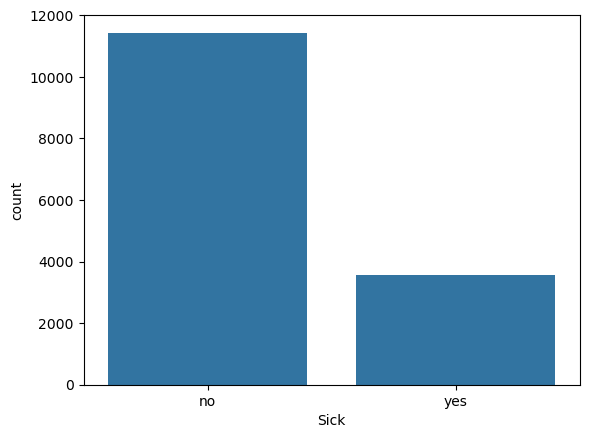

In [21]:
sns.countplot(x = y);

#### To Remove Outliers from Dataset

In [22]:
# To Remove Outliers from Dataset
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination = 0.05,random_state =0)
clean = iso.fit_predict(x)

In [23]:
clean

array([ 1, -1,  1, ...,  1,  1,  1])

In [24]:
x = x[clean == 1]
y = y[clean == 1]

In [25]:
x.shape,y.shape

((14250, 30), (14250,))

#### SMOTE

In [26]:
# SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to handle imbalanced datasets.

from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors = 5)
x_res,y_res = smote.fit_resample(x,y)

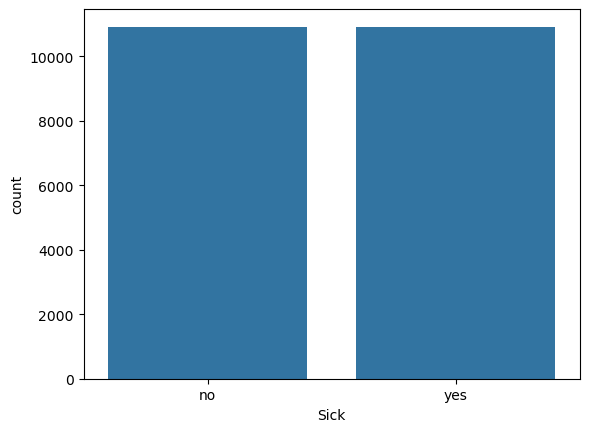

In [27]:
sns.countplot(x = y_res);

#### Select the top 10 most important features

In [28]:
#  SelectKBest with the Chi-Square (χ²) test to select the top 5 most important features from your dataset.
from sklearn.feature_selection import SelectKBest, chi2
skf = SelectKBest(k = 10, score_func = chi2)
x_new = skf.fit_transform(x_res,y_res)

# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()  # You can use any estimator here
# selector = RFE(model, n_features_to_select=5)
# x_new = selector.fit_transform(x_res, y_res)


In [29]:
x_new.shape

(21842, 10)

In [30]:
x = x_res.loc[:,skf.get_support()]

In [31]:
x

,BirthAsphyxia,HypDistrib,LVHreport,RUQO2,CO2Report,GruntingReport,Age,LVH,ChestXray_Oligaemic,Disease_TGA
0,0,0,0,0,0,0,1,0,False,True
1,0,0,1,1,1,0,0,0,False,False
2,0,0,0,0,0,0,0,0,False,False
3,0,0,1,1,0,0,0,1,False,False
4,0,0,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...
21837,0,0,0,0,0,1,0,0,True,False
21838,0,0,0,1,0,0,0,0,False,False
21839,0,0,0,0,0,0,1,0,True,False
21840,0,0,0,0,0,0,2,0,True,False


In [32]:
x.describe()

,BirthAsphyxia,HypDistrib,LVHreport,RUQO2,CO2Report,GruntingReport,Age,LVH
count,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000
mean,0.015841,0.014284,0.165095,0.637671,0.116702,0.116107,0.297134,0.154061
std,0.124863,0.118663,0.371275,0.625399,0.321072,0.320360,0.601785,0.361015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000


In [33]:
print(x_res.var())

BirthAsphyxia            0.015591
HypDistrib               0.014081
HypoxiaInO2              0.358563
CO2                      0.468636
Grunting                 0.080784
LVHreport                0.137845
LowerBodyO2              0.372974
RUQO2                    0.391123
CO2Report                0.103087
GruntingReport           0.102631
Age                      0.362145
LVH                      0.130332
LungParench              0.495672
LungFlow                 0.439421
ChestXray_Asy/Patch      0.068398
ChestXray_Grd_Glass      0.052168
ChestXray_Normal         0.207071
ChestXray_Oligaemic      0.207808
ChestXray_Plethoric      0.186808
XrayReport_Asy/Patchy    0.087090
XrayReport_Grd_Glass     0.045432
XrayReport_Normal        0.221809
XrayReport_Oligaemic     0.179081
XrayReport_Plethoric     0.190192
Disease_Fallot           0.238651
Disease_Lung             0.020530
Disease_PAIVS            0.178298
Disease_PFC              0.015901
Disease_TAPVD            0.040181
Disease_TGA   

#### Standardization

In [34]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_scaled = scaler.fit_transform(x)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [35]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,2.184200e+04,2.184200e+04,2.184200e+04,2.184200e+04,2.184200e+04,2.184200e+04,2.184200e+04,2.184200e+04,2.184200e+04,2.184200e+04
mean,4.163972e-17,2.602482e-17,-2.081986e-17,1.613539e-16,1.040993e-17,4.163972e-17,2.081986e-17,-5.204965e-17,1.301241e-17,4.163972e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.268701e-01,-1.203803e-01,-4.446805e-01,-1.019646e+00,-3.634838e-01,-3.624336e-01,-4.937660e-01,-4.267532e-01,-6.462007e-01,-5.728037e-01
25%,-1.268701e-01,-1.203803e-01,-4.446805e-01,-1.019646e+00,-3.634838e-01,-3.624336e-01,-4.937660e-01,-4.267532e-01,-6.462007e-01,-5.728037e-01
50%,-1.268701e-01,-1.203803e-01,-4.446805e-01,5.793710e-01,-3.634838e-01,-3.624336e-01,-4.937660e-01,-4.267532e-01,-6.462007e-01,-5.728037e-01
75%,-1.268701e-01,-1.203803e-01,-4.446805e-01,5.793710e-01,-3.634838e-01,-3.624336e-01,-4.937660e-01,-4.267532e-01,1.547507e+00,-5.728037e-01
max,7.882079e+00,8.307010e+00,2.248806e+00,2.178388e+00,2.751154e+00,2.759126e+00,2.829759e+00,2.343275e+00,1.547507e+00,1.745799e+00


#### Build Model

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y_res,random_state = 0, test_size=0.20,stratify = y_res)

In [37]:
x_train.shape, y_train.shape

((17473, 10), (17473,))

In [38]:
x_test.shape, y_test.shape

((4369, 10), (4369,))

In [39]:
# Build the model

# from sklearn.ensemble import RandomForestClassifier
# r_forest = RandomForestClassifier(random_state = 0, n_estimators = 100,max_features='sqrt',criterion='entropy')   #n_estimators means no. of trees

# from sklearn.svm import SVC
# svc = SVC(kernel = 'rbf') #default is RBF
# #other kernel = linear,poly, rbf,sigmoid

#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  

In [40]:
# r_forest.fit(x_train,y_train)
# svc.fit(x_train,y_train)
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [41]:
y_pred = classifier.predict(x_test)

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
accuracy_score(y_test,y_pred)

0.633325703822385

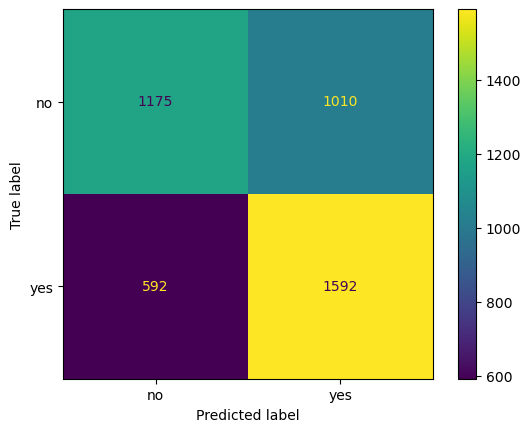

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

#### Grid search CV

In [44]:
# # define the parameter grid
# params = {'n_neighbors': [3,5,7,9,12,14,15,18],
#          'weights': ['uniform','distance'],
#          'algorithm':['auto','ball_tree','kd_tree','brute']}

# params = {'random_state':[0,42],
#          'criterion': ['gini','entropy'],
#          'max_features':['sqrt','log2'],
#          'n_estimators':[20,30,100]}
params= {
    'penalty':['l1','l2','elasticnet','none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs','newton-cg','newton-cholesky','sag','saga']
}

In [45]:
# grid search cv
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = LogisticRegression(),
                   param_grid = params,
                   scoring = 'accuracy',
                   cv = 5)
# cv --->5 :diff sets of training data (ex 80:20 split will be done 5 times taking random data)
# verbose used to show the info while training

In [46]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [47]:
y_pred = grid.predict(x_test)

In [48]:
# Accuracy
accuracy_score(y_test,y_pred)

0.633325703822385

In [49]:
grid.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

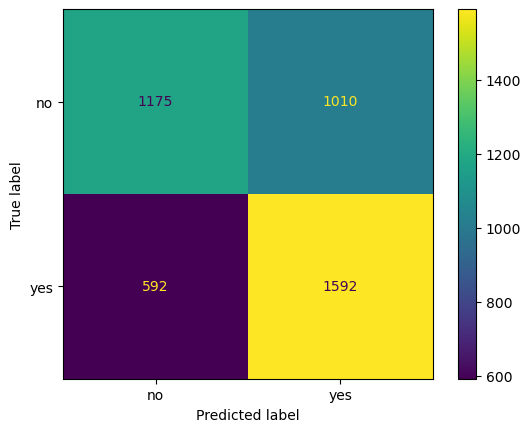

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

#### Serialization

In [51]:
import joblib

In [52]:
joblib.dump(grid.best_estimator_,'lr_classifier.pkl')

['lr_classifier.pkl']

In [53]:
joblib.dump(scaler,'lr_scaler.pkl')

['lr_scaler.pkl']